# Week 3 GRAPPA Seminar Assignment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

### Define the units

In [2]:
# length
cm = 1
m = 1e2 * cm
km = 1e3 * m
pc = 3.1e18 * cm
Mpc = 1e6 * pc
kpc = 1e3 * pc

# time
s = 1
c = 3e5 * km/s

# mass/energy
GeV = 1
eV = 1e-9 * GeV
kg = 5.61e26 * GeV
M_solar = 2e30 * kg
g = 1e-3 * kg

# other quantities
m_p = 0.938 * GeV
v0 = 220 * km / s / c
N_A = 6.022e23
rho0 = 0.3 * GeV/cm**3

## Part 1: WIMP-proton cross section

\begin{align}
\frac{dR}{dE_{r}} = \frac{R_{0}}{rE_{0}} e^{-E_{r}/rE_{0}}
\end{align}

Integrating R from the threshold energy to infinity gives 

\begin{align}
R = R_{0} e^{-E_{r}/rE_{0}}
\end{align}

where $R_{0}$ corrsponds to

\begin{align}
R_{0} = \frac{N_{A}}{A} \frac{\rho}{m_{\chi}} \sigma_{SI}(\chi + p) \frac{\mu^{2} A^{2}}{m_{p}^{2}} \langle v \rangle
\end{align}

and $\langle v \rangle$ is the average velocity. Rearranging the expression for R to give an expression for $\sigma_{SI}$ as a function of the WIMP particle mass gives

\begin{align}
\sigma_{SI}(\chi + p) = \frac{1}{\mathrm{factor}} R \frac{m_{\chi}}{\mu^{2}} e^{E_{r}/rE_{0}}
\end{align}

where the factor includes all the constants present in R$_{0}$. The value of $\sigma_{SI}(\chi + p)$ can be plotted as a function of the WIMP particle mass. These equations were taken from Particle Cosmology: DM Direct Detection notes from Auke-Pieter Colijn. 

Define the constants necessary for the computations

In [3]:
# problem related quantities
# A = 131.293 * GeV
A = 131.293 * m_p
m_det = 500 * kg
T = 365*24*3600 * s
E_thresh = 3e3 * eV

m_N = A 

# factor_R0 = T * m_det * N_A * rho0 * A * v0 / m_p**2
# factor_R0 = T * m_det * rho0 * A * (2*v0/np.sqrt(np.pi)) / m_p**2     
factor_R0 = T * m_det * N_A * rho0 * A**2 * (2*v0/np.sqrt(np.pi)) / (A * g * m_p**2)

Define functions that return the reduced mass $\mu$, r, E$_{0}$ and the WIMP proton cross-section $\sigma_{SI}$.

In [4]:
def mu(m_x):
#     m_N = A/N_A * GeV/g
    return m_x*m_N / (m_x + m_N)

def r(m_x):
#     m_N = A/N_A * GeV/g
    return 4*m_x*m_N / (m_x + m_N)**2

def E0(m_x):
#     return 0.5*m_x*(2*v0/np.sqrt(np.pi))**2
    return 0.5*m_x*v0**2

def sigma_px(m_x):
    return m_x*c * max_events * np.exp(E_thresh / (r(m_x) * E0(m_x))) / (factor_R0 * mu(m_x)**2 * c**2)


For a WIMP particle with mass of 100 GeV and a confidence level of 95%, calculate the WIMP proton cross-section.

In [5]:
confidence = 95
m_x = 100 * GeV 

max_events = -np.log(1-confidence/100)

print(sigma_px(m_x)) 

1.112360394423267e-47


## Plot the WIMP proton cross-section as a function of the WIMP particle mass

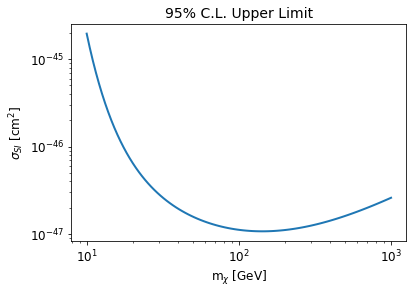

In [6]:
m_arr = np.logspace(1, 3, 100)

fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.plot(m_arr, sigma_px(m_arr), lw=2)
ax.set_xlabel(r'm$_{\chi}$ [GeV]', fontsize=12)
ax.set_ylabel(r'$\sigma_{SI}$ [cm$^{2}$]', fontsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_title(r'95% C.L. Upper Limit', fontsize=14)
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

## Part 2: Plot 68% and 95% reconstruction contours in the WIMP-proton coupling cross-section vs dark matter mass plane

In [7]:
# Recoil energy between 3 and 10 keV and 10 keV and 20 keV. 
# Mass of WIMP between 10 and 1000 GeV

m = np.logspace(1, 3, 20)
sigma = np.logspace(-47, -43, 20)

# make a grid
X, Y = np.meshgrid(m, sigma)

# The minus sign comes from the integration of dR/dE_r
N1 = - factor_R0 * Y * mu(X)**2 * (np.exp(-10e3*eV/(r(X)*E0(X))) - np.exp(-3e3*eV/(r(X)*E0(X)))) / X
N2 = - factor_R0 * Y * mu(X)**2 * (np.exp(-20e3*eV/(r(X)*E0(X))) - np.exp(-10e3*eV/(r(X)*E0(X)))) / X

In [34]:
# Chi_squared calculation
N1_observed = 10
N2_observed = 5

def events(confidence): 
     return -np.log(1-confidence/100)

# confidence levels
HL = events(95)
LL = events(68)
print(HL,LL)
    
def chi_squared(N1_observed, N2_observed):
    N1_diff = (N1 - N1_observed)**2 / N1
    N2_diff = (N2 - N2_observed)**2 / N2
    return N1_diff + N2_diff

print(chi_squared(N1_observed, N2_observed))
    

2.99573227355399 1.139434283188365
[[5.76193230e+17 3.91821185e+15 1.69399184e+14 2.61824152e+13
  9.56098416e+12 5.84345463e+12 4.77045983e+12 4.59631197e+12
  4.88881094e+12 5.52794697e+12 6.49845271e+12 7.83465547e+12
  9.60465009e+12 1.19075565e+13 1.48765325e+13 1.86853483e+13
  2.35580267e+13 2.97817575e+13 3.77236891e+13 4.78525166e+13]
 [3.54847570e+17 2.41302376e+15 1.04324185e+14 1.61243935e+13
  5.88811499e+12 3.59868108e+12 2.93787916e+12 2.83063051e+12
  3.01076547e+12 3.40437625e+12 4.00206047e+12 4.82495856e+12
  5.91500657e+12 7.33324735e+12 9.16168591e+12 1.15073383e+13
  1.45081686e+13 1.83410421e+13 2.32320665e+13 2.94698867e+13]
 [2.18532241e+17 1.48605636e+15 6.42478625e+13 9.93017891e+12
  3.62618508e+12 2.21624130e+12 1.80928762e+12 1.74323873e+12
  1.85417453e+12 2.09657903e+12 2.46466178e+12 2.97144210e+12
  3.64274622e+12 4.51616726e+12 5.64220788e+12 7.08677372e+12
  8.93482969e+12 1.12952979e+13 1.43074266e+13 1.81489770e+13]
 [1.34582690e+17 9.15185153e+14 

Text(0.5, 1.0, '$\\chi^2$ values')

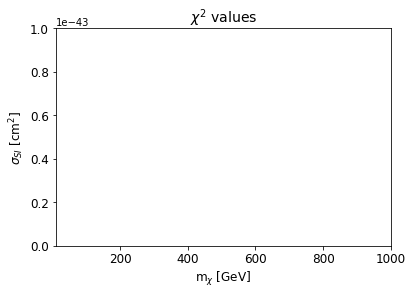

In [33]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(6,4))
CS = ax.contour(X, Y, chi_squared(N1_observed, N2_observed), levels=[HL,LL])
ax.set_xlabel(r'm$_{\chi}$ [GeV]', fontsize=12)
ax.set_ylabel(r'$\sigma_{SI}$ [cm$^{2}$]', fontsize=12)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_title(r'$\chi^2$ values', fontsize=14)

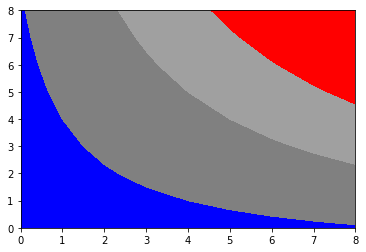

In [28]:
x = np.arange(1, 10)
y = x.reshape(-1, 1)
h = x * y

cs = plt.contourf(h, levels=[10, 30, 50],
    colors=['#808080', '#A0A0A0', '#C0C0C0'], extend='both')
cs.cmap.set_over('red')
cs.cmap.set_under('blue')
cs.changed()